In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
class Brownian:
    def __init__(self, n, c, N=100, adaptative=True):
        self.n = n # number of particles
        self.c = c # initial proportion of particles

        if(adaptative): self.plot_N = 3*n
        else: self.plot_N = N
        self.N = N

        # Place particles at even intervals along the axis and
        # fill the rest with NaNs to avoid plotting values that
        # haven't been calculated
        self.x = np.ma.zeros((self.N, n))
        self.x[0] = np.random.choice(np.linspace(-1, 1, 2*n+1), size=n, replace=False)

        # Assign a number of particle and antiparticle state
        n_p = int(n*c)
        n_a = n - n_p
        self.particles = np.concatenate((-1*np.ones(n_a), 1*np.ones(n_p)))

        self.compute()

    def compute(self):
        N, n = self.N, self.n
        x, particles = self.x, self.particles

        self.annihilated = annihilated = np.zeros((N, n))

        for ((t, i), _) in np.ndenumerate(x[0:N-1]):
            # Check if the particle has already been annihilated
            if annihilated[t, i] == 1: 
                continue

            for j in range(i):
                # Check if the particle has already been annihilated 
                if annihilated[t, j] == 1: 
                    continue

                # Check if particles are of opposite kind and have collided
                if particles[i] == -particles[j] and np.allclose(x[t, i], x[t, j]):
                    annihilated[t+1:, i] = annihilated[t+1:, j] = 1

            x[t + 1] = x[t] + np.random.choice([-1/(2*n), 1/(2*n)], size=n)

    def plot(self):
        N, n = self.N, self.n

        # Plot the grid lines
        kwargs = {'color': 'k', 'ls': '--', 'lw': 0.2}
        for i in np.linspace(-1, 1, 2*n+1):
            plt.axline((0, i), slope=1/(2*n), **kwargs)
            plt.axline((0, i), slope=-1/(2*n), **kwargs)
        for i in np.arange(2, self.plot_N, 2):
            plt.axline((i, -1), slope=1/(2*n), **kwargs)
            plt.axline((i, 1), slope=-1/(2*n), **kwargs)

        # Mask the annihilated particles
        x = np.ma.array(self.x, mask=self.annihilated)

        # Plot the trajectories of all particles
        for i, p in enumerate(self.particles):
            plt.plot(range(N), x[:, i], color = 'b' if p == 1 else 'r')

        plt.ylim([-1, 1])
        plt.xlim([0, self.plot_N-1])
        plt.xticks([])
        plt.yticks([])

        plt.title("Discrete brownian walk of particles and antiparticles")
        plt.xlabel("Time")
        plt.ylabel("Position")

        plt.show()

    def concentration(self, full_plot=False):
        N = self.N

        # Indices of first-kind particles, array of all
        # particles
        p_idx = np.where(self.particles == 1)[0]
        x = np.ma.array(self.x, mask=self.annihilated)

        concentration = np.zeros(N)
        for t in range(N):
            # The concentration at the time t is the number of
            # particles over the total number of particles and
            # antiparticles
            concentration[t] = np.ma.count(x[t, p_idx])/np.ma.count(x[t])

        plt.plot(range(N), concentration)
        if full_plot: plt.ylim(0, 1)

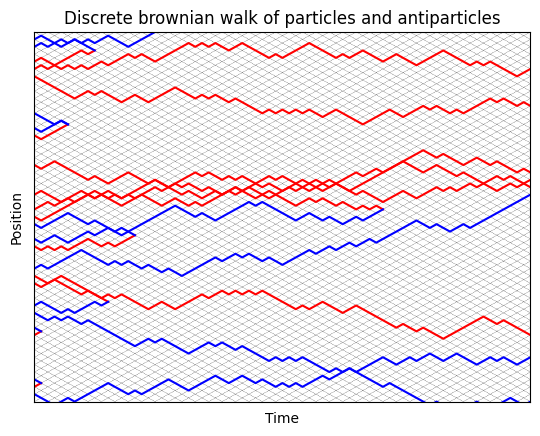

In [33]:
b = Brownian(25, 0.5)
b.plot()

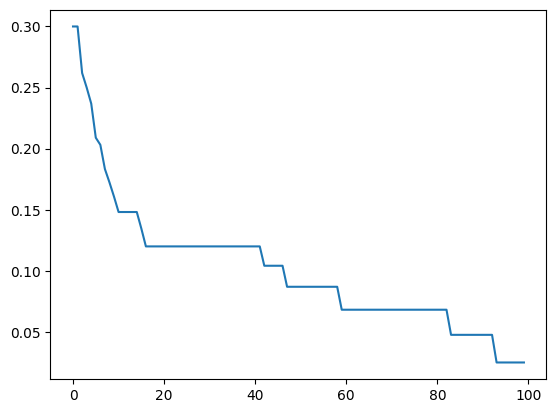

In [4]:
b = Brownian(100, 0.3)
b.concentration()